# Exploratory Data Analysis - Movie Lens Dataset

![](https://lambdan.se/blog/2019/12/31/movies-i-watched-in-2019/03fb507e0ce5590520c511b35374785e.png)

The exploratory data analysis presented in this notebook is part of the final project for the begginer data analysis course provided by [Jovian](https://www.jovian.ml/) that started on 08/15/2020 and spanned for 6 weeks.
Course participants were required to explore a dataset of their choice and perform exploratory data analysis by asking and answering five interesting questions.

I chose the [MovieLens](https://grouplens.org/datasets/movielens/) dataset from Kaggle and will be using only with the movies_metadata.csv and the credit.csv files. Below is a brief overview of the data. More information about the dataset can be found [here](https://www.kaggle.com/rounakbanik/the-movies-dataset).

These files contain metadata for all 45,000 movies listed in the Full MovieLens Dataset. The dataset consists of movies released on or before July 2017. Data points include cast, crew, plot keywords, budget, revenue, posters, release dates, languages, production companies, countries, TMDB vote counts and vote averages.
movies_metadata.csv: The main Movies Metadata file. Contains information on 45,000 movies featured in the Full MovieLens dataset. Features include posters, backdrops, budget, revenue, release dates, languages, production countries and companies.
credits.csv: Consists of Cast and Crew Information for all our movies. Available in the form of a stringified JSON Object.

The notebook is divided into three main sections - Data Cleaning and Preparation, Data Exploration and Visualization and ending with Summary and Conclusion.

## Sections
- [Data Cleaning and Preparation](#C5)
    - [Imports](#C8)
    - [Loading csv file into a pandas DataFrame](#C11)
    - [Dropping irrelevant columns](#C18)
    - [Data Cleaning](#C23)
    - [Changing Columns to Correct Dtypes](#C36)
    - [Dropping Missing Values](#C43)
    - [Removing Duplicates](#C47)

- [Data Exploration and Visualization](#C54)
    - [Summary Statistics](#C55)
    - [Top 10](#C60)
        - [Budget](#C61)
        - [Box Office Revenue](#C64)
        - [Box Office Hits](#C67)
        - [Box Office Flops](#C73)
        - [Ratings](#C77)
    - [Asking and Answering Questions](#C80)
        - [What are the movie genres that famous directors (Hollywood and Bollywood) have mostly worked in?](#C81)
        - [Who are the most number of actors that famous directors have worked with?](#C97)
        - [What are the top 10 languages in terms of revenue?](#C106)
        - [What are the top 10 rated movies in the top 10 languages with the highest revenue?](#C110)
        - [What are the top 5 Genres each year?](#C114)

- [Summary and Conclusion](#C123)

In [1]:
# project_name = 'movielens-eda'

In [2]:
# !pip install jovian --upgrade -q
# !pip install pandas --upgrade -q
# !pip install matplotlib --upgrade -q
# !pip install seaborn --upgrade -q

<hr style="height:10px; border-radius:10px; background: linear-gradient(to right, #0F2027, #203A43, #2C5364);"> </hr>

## Data Cleaning and Preparation <a id='C5'></a>

### Imports <a id='C8'></a>

In [3]:
# import jovian
import numpy as np; import pandas as pd; import matplotlib.pyplot as plt
import seaborn as sns
import bar_chart_race as bcr
import pycountry             
import operator
from IPython.display import HTML
from collections import Counter
import warnings     

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

<hr style="height:5px; border-radius:10px; background: linear-gradient(to right, #0F2027, #203A43, #2C5364);"> </hr>

### Loading csv file into a pandas DataFrame <a id='C11'></a>

In [4]:
warnings.filterwarnings('ignore')
movies = pd.read_csv('movies_metadata.csv')
pd.options.display.max_columns = 30
pd.set_option('display.float_format', '{:,}'.format) #to display float with commas

<br></br>
A quick look at the data.

In [5]:
movies.set_index('id', inplace=True)
movies.head(3)

adult                              belongs_to_collection    budget  \
id                                                                          
862    False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
8844   False                                                NaN  65000000   
15602  False  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0   

                                                  genres  \
id                                                         
862    [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
8844   [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
15602  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   

                                   homepage    imdb_id original_language  \
id                                                                         
862    http://toystory.disney.com/toy-story  tt0114709                en   
8844                                    NaN  tt0113497                en   
15602                                   NaN  tt0113228                en   

         original_title                                           overview  \
id                                                                           
862           Toy Story  Led by Woody, Andy's toys live happily in his ...   
8844            Jumanji  When siblings Judy and Peter discover an encha...   
15602  Grumpier Old Men  A family wedding reignites the ancient feud be...   

      popularity                       poster_path  \
id                                                   
862    21.946943  /rhIRbceoE9lR4veEXuwCC2wARtG.jpg   
8844   17.015539  /vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg   
15602    11.7129  /6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg   

                                    production_companies  \
id                                                         
862       [{'name': 'Pixar Animation Studios', 'id': 3}]   
8844   [{'name': 'TriStar Pictures', 'id': 559}, {'na...   
15602  [{'name': 'Warner Bros.', 'id': 6194}, {'name'...   

                                    production_countries release_date  \
id                                                                      
862    [{'iso_3166_1': 'US', 'name': 'United States o...   1995-10-30   
8844   [{'iso_3166_1': 'US', 'name': 'United States o...   1995-12-15   
15602  [{'iso_3166_1': 'US', 'name': 'United States o...   1995-12-22   

            revenue  runtime  \
id                             
862   373,554,033.0     81.0   
8844  262,797,249.0    104.0   
15602           0.0    101.0   

                                        spoken_languages    status  \
id                                                                   
862             [{'iso_639_1': 'en', 'name': 'English'}]  Released   
8844   [{'iso_639_1': 'en', 'name': 'English'}, {'iso...  Released   
15602           [{'iso_639_1': 'en', 'name': 'English'}]  Released   

                                                 tagline             title  \
id                                                                           
862                                                  NaN         Toy Story   
8844           Roll the dice and unleash the excitement!           Jumanji   
15602  Still Yelling. Still Fighting. Still Ready for...  Grumpier Old Men   

       video  vote_average  vote_count  
id                                      
862    False           7.7     5,415.0  
8844   False           6.9     2,413.0  
15602  False           6.5        92.0

<br></br>
Checking the number of rows and columns in the dataset.

In [6]:
print(f'Number of rows: {movies.shape[0]}')
print(f'Number of columns: {movies.shape[1]}')

Number of rows: 45466
Number of columns: 23


<hr style="height:5px; border-radius:10px; background: linear-gradient(to right, #0F2027, #203A43, #2C5364);"> </hr>

### Dropping irrelevant columns <a id='C18'></a>

In [7]:
movies.drop(movies[movies['adult'] == 'True'].index, axis='rows', inplace=True)
movies.drop(labels = ['adult', 'belongs_to_collection', 'homepage', 'poster_path', 'video'], axis='columns', inplace=True)

<br></br>
We will be working with the remaning columns shown below. As the columns were all over the place, rearranging them with the reindex method makes it look more organized. You can compare the DataFrame outputs from above and below to see if this made any difference.

In [8]:
movies.columns
movies = movies.reindex(columns = ['imdb_id','title','original_title','release_date','overview','tagline','genres', 'runtime',
                                   'original_language','spoken_languages','production_companies','production_countries', 
                                   'budget', 'revenue','status',  'vote_average','vote_count','popularity',])
movies.head(3)

Index(['budget', 'genres', 'imdb_id', 'original_language', 'original_title',
       'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

imdb_id             title    original_title release_date  \
id                                                                  
862    tt0114709         Toy Story         Toy Story   1995-10-30   
8844   tt0113497           Jumanji           Jumanji   1995-12-15   
15602  tt0113228  Grumpier Old Men  Grumpier Old Men   1995-12-22   

                                                overview  \
id                                                         
862    Led by Woody, Andy's toys live happily in his ...   
8844   When siblings Judy and Peter discover an encha...   
15602  A family wedding reignites the ancient feud be...   

                                                 tagline  \
id                                                         
862                                                  NaN   
8844           Roll the dice and unleash the excitement!   
15602  Still Yelling. Still Fighting. Still Ready for...   

                                                  genres  runtime  \
id                                                                  
862    [{'id': 16, 'name': 'Animation'}, {'id': 35, '...     81.0   
8844   [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...    104.0   
15602  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...    101.0   

      original_language                                   spoken_languages  \
id                                                                           
862                  en           [{'iso_639_1': 'en', 'name': 'English'}]   
8844                 en  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...   
15602                en           [{'iso_639_1': 'en', 'name': 'English'}]   

                                    production_companies  \
id                                                         
862       [{'name': 'Pixar Animation Studios', 'id': 3}]   
8844   [{'name': 'TriStar Pictures', 'id': 559}, {'na...   
15602  [{'name': 'Warner Bros.', 'id': 6194}, {'name'...   

                                    production_countries    budget  \
id                                                                   
862    [{'iso_3166_1': 'US', 'name': 'United States o...  30000000   
8844   [{'iso_3166_1': 'US', 'name': 'United States o...  65000000   
15602  [{'iso_3166_1': 'US', 'name': 'United States o...         0   

            revenue    status  vote_average  vote_count popularity  
id                                                                  
862   373,554,033.0  Released           7.7     5,415.0  21.946943  
8844  262,797,249.0  Released           6.9     2,413.0  17.015539  
15602           0.0  Released           6.5        92.0    11.7129

<hr style="height:5px; border-radius:10px; background: linear-gradient(to right, #0F2027, #203A43, #2C5364);"> </hr>

### Data Cleaning <a id='C23'></a>

The columns - *genres*, *production_companies*, *production_countries* and *spoken_languages* looks like json objects converted to string. The following code cells extracts relevant substring with regular expression.

In [9]:
movies[['title', 'genres', 'production_companies', 'production_countries', 'spoken_languages']].head(3)

title                                             genres  \
id                                                                           
862           Toy Story  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
8844            Jumanji  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
15602  Grumpier Old Men  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   

                                    production_companies  \
id                                                         
862       [{'name': 'Pixar Animation Studios', 'id': 3}]   
8844   [{'name': 'TriStar Pictures', 'id': 559}, {'na...   
15602  [{'name': 'Warner Bros.', 'id': 6194}, {'name'...   

                                    production_countries  \
id                                                         
862    [{'iso_3166_1': 'US', 'name': 'United States o...   
8844   [{'iso_3166_1': 'US', 'name': 'United States o...   
15602  [{'iso_3166_1': 'US', 'name': 'United States o...   

                                        spoken_languages  
id                                                        
862             [{'iso_639_1': 'en', 'name': 'English'}]  
8844   [{'iso_639_1': 'en', 'name': 'English'}, {'iso...  
15602           [{'iso_639_1': 'en', 'name': 'English'}]

<br></br>
As you can see from the columns above, the substring we need follows a pattern - a colon, followed by whitespace, a single quote, a words or words and finally a single quote.

We can define this pattern with a regex, compile it and use it to find all words with that pattern in each column by applying a lambda function. If this was confusing, you can jump to the [final result](#C33) to see the cleaned data and compare it to the output above to see what we are trying to accomplish.

In [10]:
import re

regex = re.compile(r": '(.*?)'")
movies['genres'] = movies['genres'].apply(lambda x: ', '.join(regex.findall(x)))

<br></br>
The above code can be apllied to the remaining columns - *production_companies*, *production_countries* and *spoken_languages*, but we need to remove missing values to avoid additional logic in the lambda function. The missing values are miniscule compared to the entire dataset so dropping these would not affect further analysis.

In [11]:
print('Number of missing values in production_companies column: {}'.format(movies['production_companies'].isna().sum()))
print('Number of missing values in spoken_languages column: {}'.format(movies['spoken_languages'].isna().sum()))

Number of missing values in production_companies column: 3
Number of missing values in spoken_languages column: 6


In [12]:
movies.dropna(subset=['production_companies'], axis='rows', inplace=True)
movies.dropna(subset=['spoken_languages'], axis='rows', inplace=True)

print('Number of missing values in production_companies column: {}'.format(movies['production_companies'].isna().sum()))
print('Number of missing values in spoken_languages column: {}'.format(movies['spoken_languages'].isna().sum()))

Number of missing values in production_companies column: 0
Number of missing values in spoken_languages column: 0


<br></br>
Extracting relevant substring from *production_companies*, *production_countries* and *spoken_languages* as done with *genres* above.

In [13]:
movies['production_companies'] = movies['production_companies'].apply(lambda x: ', '.join(regex.findall(x)))
movies['production_countries'] = movies['production_countries'].apply(lambda x: ', '.join(regex.findall(x)))
movies['spoken_languages'] = movies['spoken_languages'].apply(lambda x: ', '.join(regex.findall(x)))

<br></br><a id='C33'></a>
Final result:

In [14]:
movies[['title', 'genres', 'production_companies', 'production_countries', 'spoken_languages']].head(3)

title                      genres  \
id                                                    
862           Toy Story   Animation, Comedy, Family   
8844            Jumanji  Adventure, Fantasy, Family   
15602  Grumpier Old Men             Romance, Comedy   

                                    production_companies  \
id                                                         
862                              Pixar Animation Studios   
8844   TriStar Pictures, Teitler Film, Interscope Com...   
15602                       Warner Bros., Lancaster Gate   

               production_countries           spoken_languages  
id                                                              
862    US, United States of America                en, English  
8844   US, United States of America  en, English, fr, Français  
15602  US, United States of America                en, English

<hr style="height:5px; border-radius:10px; background: linear-gradient(to right, #0F2027, #203A43, #2C5364);"> </hr>

### Changing Columns to Correct Dtypes <a id='C36'></a>

*budget*, *popularity*, *release_date* and *runtime* needs to be changed from object dtype to float, float, datetime and timedelta respectively. This will help with data analysis and visualization later on.

In [15]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45451 entries, 862 to 461257
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   imdb_id               45434 non-null  object 
 1   title                 45451 non-null  object 
 2   original_title        45451 non-null  object 
 3   release_date          45368 non-null  object 
 4   overview              44497 non-null  object 
 5   tagline               20406 non-null  object 
 6   genres                45451 non-null  object 
 7   runtime               45194 non-null  float64
 8   original_language     45440 non-null  object 
 9   spoken_languages      45451 non-null  object 
 10  production_companies  45451 non-null  object 
 11  production_countries  45451 non-null  object 
 12  budget                45451 non-null  object 
 13  revenue               45451 non-null  float64
 14  status                45370 non-null  object 
 15  vote_average         

In [16]:
movies['budget'] = movies['budget'].astype(float)
movies['popularity'] = movies['popularity'].astype(float)
movies['release_date'] = pd.to_datetime(movies['release_date'], format='%Y/%m/%d', errors='coerce')
movies['runtime'] = pd.to_timedelta(movies['runtime'], unit='m')

<br></br>
Dtypes changed.

In [17]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45451 entries, 862 to 461257
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype          
---  ------                --------------  -----          
 0   imdb_id               45434 non-null  object         
 1   title                 45451 non-null  object         
 2   original_title        45451 non-null  object         
 3   release_date          45368 non-null  datetime64[ns] 
 4   overview              44497 non-null  object         
 5   tagline               20406 non-null  object         
 6   genres                45451 non-null  object         
 7   runtime               45194 non-null  timedelta64[ns]
 8   original_language     45440 non-null  object         
 9   spoken_languages      45451 non-null  object         
 10  production_companies  45451 non-null  object         
 11  production_countries  45451 non-null  object         
 12  budget                45451 non-null  float64        
 13  rev

<hr style="height:5px; border-radius:10px; background: linear-gradient(to right, #0F2027, #203A43, #2C5364);"> </hr>

### Dropping Missing Values<a id='C43'></a>

Dropping missing values from the *imdb_id* column.

In [18]:
print('Number of missing values in imdb_id: {}'.format(movies['imdb_id'].isna().sum()))
movies.dropna(subset=['imdb_id'], inplace=True)
print('Number of missing values in imdb_id after drop: {}'.format(movies['imdb_id'].isna().sum()))

Number of missing values in imdb_id: 17
Number of missing values in imdb_id after drop: 0


<hr style="height:5px; border-radius:10px; background: linear-gradient(to right, #0F2027, #203A43, #2C5364);"> </hr>

### Removing Duplicates <a id='C47'></a>

Listed below are ten movies among all the duplicate *imdb_id* that needs to be removed.

In [19]:
cond = movies['imdb_id'].duplicated(keep=False)
movies.loc[cond, ['imdb_id','title','release_date', 'overview']].sort_values('imdb_id').head(10)

imdb_id               title release_date  \
id                                                   
99080   tt0022537          The Viking   1931-06-21   
99080   tt0022537          The Viking   1931-06-21   
22649   tt0022879  A Farewell to Arms   1932-12-08   
22649   tt0022879  A Farewell to Arms   1932-12-08   
132641  tt0046468                Wife   1953-04-29   
132641  tt0046468                Wife   1953-04-29   
5511    tt0062229         Le Samouraï   1967-10-25   
5511    tt0062229         Le Samouraï   1967-10-25   
42495   tt0067306           King Lear   1971-02-04   
42495   tt0067306           King Lear   1971-02-04   

                                                 overview  
id                                                         
99080   Originally called White Thunder, American prod...  
99080   Originally called White Thunder, American prod...  
22649   British nurse Catherine Barkley (Helen Hayes) ...  
22649   British nurse Catherine Barkley (Helen Hayes) ...  
132641  Ten years into a marriage, the wife is disappo...  
132641  Ten years into a marriage, the wife is disappo...  
5511    Hitman Jef Costello is a perfectionist who alw...  
5511    Hitman Jef Costello is a perfectionist who alw...  
42495   King Lear, old and tired, divides his kingdom ...  
42495   King Lear, old and tired, divides his kingdom ...

In [20]:
print('Number of duplicate imdb_ids before drop: {}'.format(movies['imdb_id'].duplicated().sum()))
movies.drop_duplicates('imdb_id', inplace=True)
print('Number of duplicate imdb_ids remaining: {}'.format(movies['imdb_id'].duplicated().sum()))

Number of duplicate imdb_ids before drop: 30
Number of duplicate imdb_ids remaining: 0


<br></br>
Rows with duplicate titles will not be removed as they are either remakes of old movies or different movies with the same title.

In [21]:
cond = movies['title'].duplicated(keep=False)
movies.loc[cond, ['imdb_id','title','release_date', 'overview']].sort_values('title').head(10)

imdb_id                         title release_date  \
id                                                             
118658  tt0339976                    10 Minutes   2002-01-01   
244046  tt3180640                    10 Minutes   2014-04-24   
12219   tt0118528                  12 Angry Men   1997-08-17   
389     tt0050083                  12 Angry Men   1957-03-25   
27934   tt0075468                     12 Chairs   1976-12-31   
31648   tt0065670                     12 Chairs   1971-06-21   
2966    tt0118248  20,000 Leagues Under the Sea   1997-05-11   
2965    tt0118247  20,000 Leagues Under the Sea   1997-03-23   
173     tt0046672  20,000 Leagues Under the Sea   1954-12-23   
30266   tt0006333  20,000 Leagues Under the Sea   1916-12-24   

                                                 overview  
id                                                         
118658  10 minutes doesn't seem long to a Japanese tou...  
244046  “10 Minutes” is a small film, but also strikin...  
12219   During the trial of a man accused of his fathe...  
389     The defense and the prosecution have rested an...  
27934   A former aristocrat Ippolit Vorobyaninov leads...  
31648   A former aristocrat Ippolit Vorobyaninov leads...  
2966    The year is 1886, when New England's fishing h...  
2965    In the 19th century, an expert marine biologis...  
173     A ship sent to investigate a wave of mysteriou...  
30266   Captain Nemo has built a fantastic submarine f...

<hr style="height:10px; border-radius:10px; background: linear-gradient(to right, #0F2027, #203A43, #2C5364);"> </hr>

## Data Exploration and Visualization <a id='C54'></a>

### Summary Statistics <a id='C55'></a>

In [22]:
movies.describe().T

count                       mean                        std  \
runtime         45149  0 days 01:34:08.214135418  0 days 00:38:24.402009439   
budget       45,404.0        4,227,153.590851027       17,433,245.113629386   
revenue      45,404.0       11,219,305.039005375       64,369,992.975551724   
vote_average 45,404.0          5.619218571050714         1.9230954019045485   
vote_count   45,404.0         109.99442780371774          491.6008886574426   
popularity   45,404.0         2.9222796452295055          6.008136538562109   

                          min                 25%              50%  \
runtime       0 days 00:00:00     0 days 01:25:00  0 days 01:35:00   
budget                    0.0                 0.0              0.0   
revenue                   0.0                 0.0              0.0   
vote_average              0.0                 5.0              6.0   
vote_count                0.0                 3.0             10.0   
popularity                0.0 0.38612175000000004         1.127685   

                            75%               max  
runtime         0 days 01:47:00   0 days 20:56:00  
budget                      0.0     380,000,000.0  
revenue                     0.0   2,787,965,087.0  
vote_average                6.8              10.0  
vote_count                 34.0          14,075.0  
popularity   3.6794787500000004 547.4882980000001

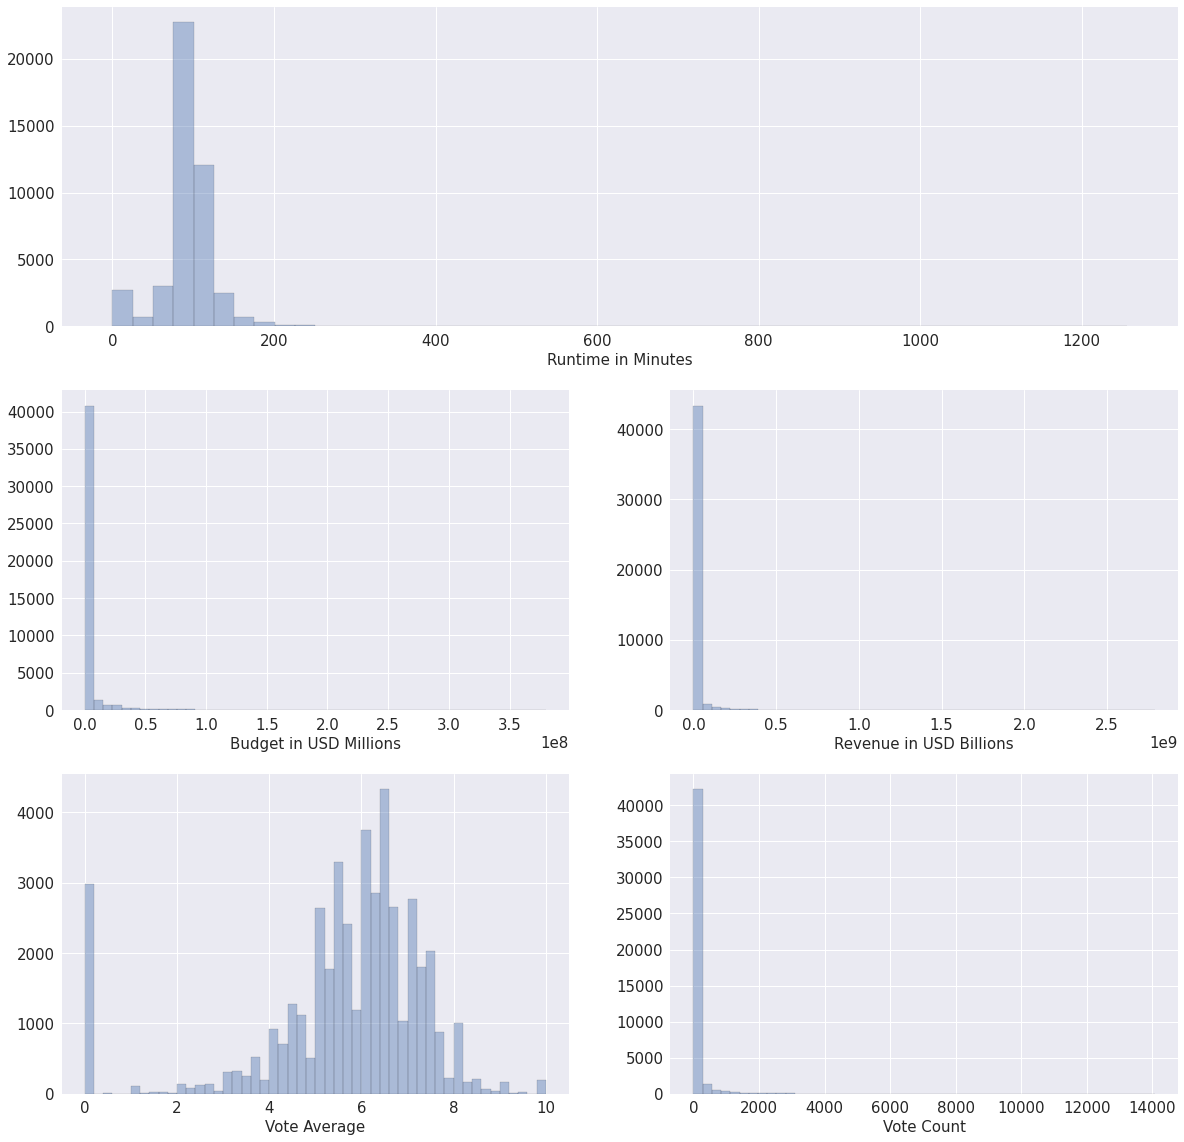

In [23]:
runtime_int = movies['runtime']/np.timedelta64(1, 'm')

with plt.style.context('seaborn'):
    fig = plt.figure(figsize=(20,20));
    grid = plt.GridSpec(3, 2, wspace=0.2, hspace=0.2);
    plt.rc(('xtick', 'ytick'), labelsize=15); plt.rc('axes', labelsize=15); plt.rcParams["patch.force_edgecolor"] = True;
    _ = plt.subplot(grid[0, 0:]); _ = sns.distplot(runtime_int, kde=False, axlabel='Runtime in Minutes');
    _ = plt.subplot(grid[1,0]); _ = sns.distplot(movies['budget'], kde=False, axlabel='Budget in USD Millions');
    _ = plt.subplot(grid[1,1]); _ = sns.distplot(movies['revenue'], kde=False, axlabel='Revenue in USD Billions');
    _ = plt.subplot(grid[2,0]); _ = sns.distplot(movies['vote_average'], kde=False, axlabel='Vote Average');
    _ = plt.subplot(grid[2,1]); _ = sns.distplot(movies['vote_count'], kde=False, axlabel='Vote Count');


<br></br>
The histograms are the visualization of the data above. As you can see all except one are highly skewed to the right due to a large number of zero or small values. The strong assumption for zero values can be attributed to the non availability of data since you cannot make a movie for free and not see a little bit of revenue.

Vote_average is the only column that closely resembles a normal distribution with a median of 6.

<hr style="height:5px; border-radius:10px; background: linear-gradient(to right, #0F2027, #203A43, #2C5364);"> </hr>

### Top 10 <a id='C60'></a>

Listed below are the top 10 movies based on budget, revenue, hits, flops and ratings.

#### Budget <a id='C61'></a>

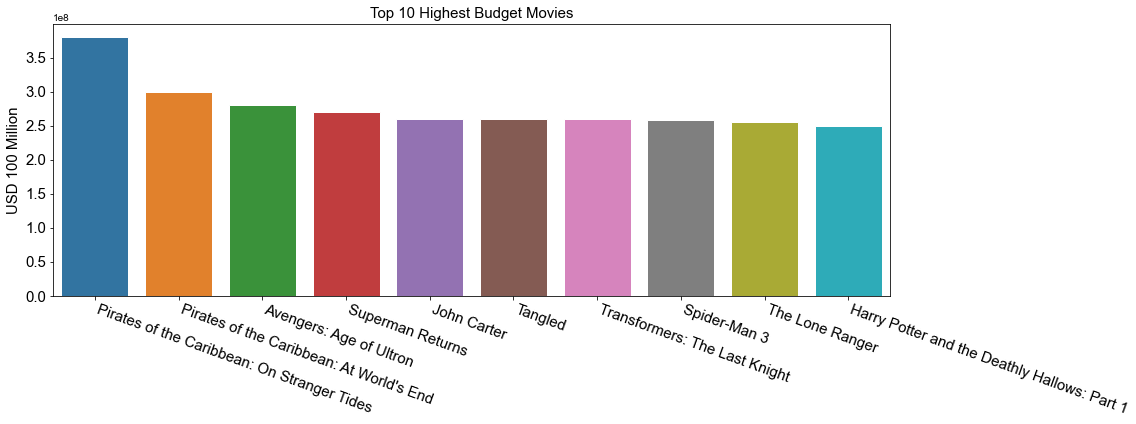

In [24]:
cols = ['title', 'budget']
budget_df = movies.sort_values('budget', ascending=False)[cols].set_index('title')
top_10_budget = budget_df.head(10)

fig, ax = plt.subplots(figsize=(15,5))
sns.set_style('dark')
sns.barplot(data=top_10_budget, x=top_10_budget.index, y='budget');
plt.xticks(ha='left', rotation=-20, fontsize=15); plt.yticks(fontsize=15)
plt.xlabel(''); plt.ylabel('USD 100 Million', fontsize=15);
plt.title('Top 10 Highest Budget Movies', fontsize=15);

<hr style="height:2px; border-radius:10px; background: linear-gradient(to right, #0F2027, #203A43, #2C5364);"> </hr>

#### Box Office Revenue <a id='C64'></a>

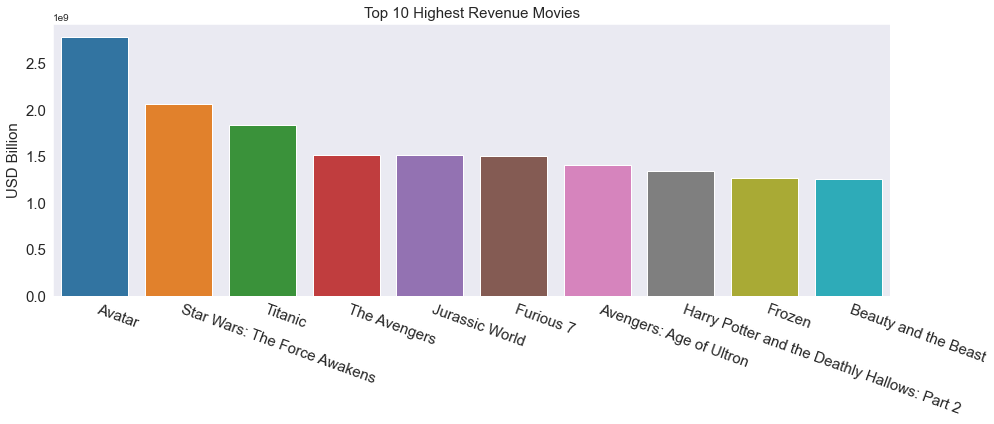

In [25]:
cols = ['title', 'revenue']
revenue_df = movies.sort_values('revenue', ascending=False)[cols].set_index('title')
top_10_revenue = revenue_df.head(10)

fig, ax = plt.subplots(figsize=(15,5))
sns.set_style('dark')
sns.barplot(data=top_10_revenue, x=top_10_revenue.index, y='revenue');
plt.xticks(ha='left', rotation=-20, fontsize=15); plt.yticks(fontsize=15)
plt.xlabel(''); plt.ylabel('USD Billion', fontsize=15);
plt.title('Top 10 Highest Revenue Movies', fontsize=15);

<hr style="height:2px; border-radius:10px; background: linear-gradient(to right, #0F2027, #203A43, #2C5364);"> </hr>

#### Box Office Hits <a id='C67'></a>

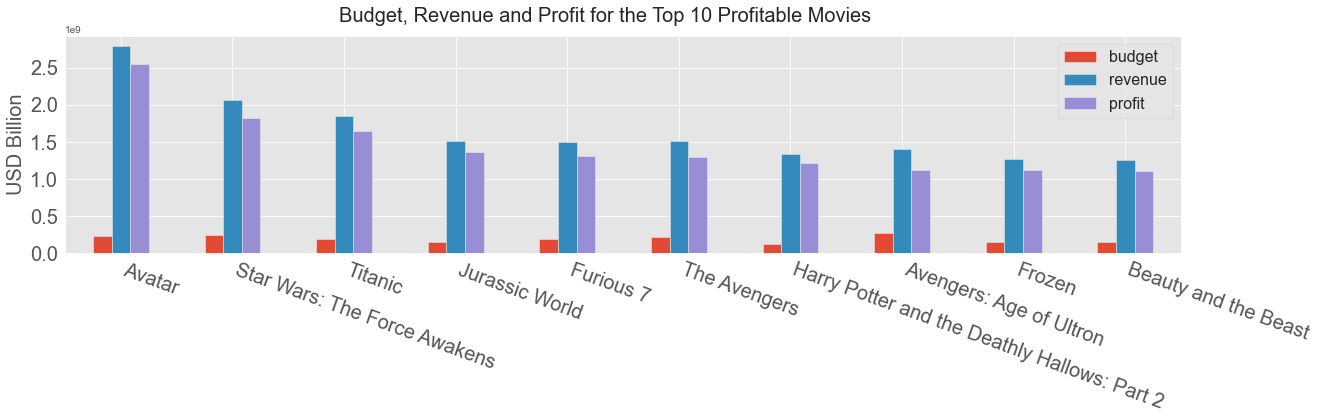

In [26]:
profits_ser = movies['revenue'] - movies['budget']
profits_ser.name = 'profit'
profits_df = movies.join(profits_ser)[['title', 'budget', 'revenue', 'profit']].sort_values('profit', ascending=False)
top_10_profits = profits_df.head(10).set_index('title')

plt.style.use('ggplot')
top_10_profits.plot(kind='bar', figsize=(20,4), fontsize=20)
plt.ylabel('USD Billion', fontsize=20); plt.xlabel('')
plt.xticks(rotation=-20, ha='left')
plt.suptitle('Budget, Revenue and Profit for the Top 10 Profitable Movies', fontsize=20)
plt.axes().legend(fontsize=16);

Visually we can see the huge gap between budget and profit in the ten most profitable movies.

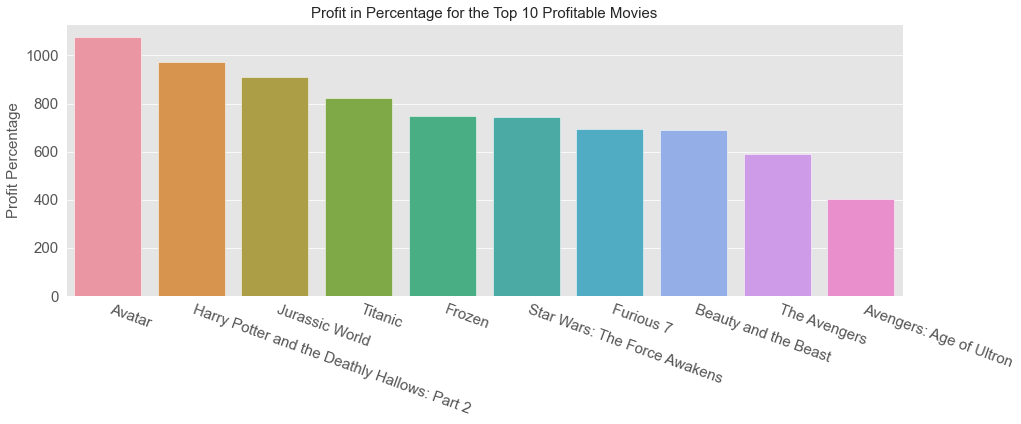

In [27]:
profits_ser_perc = (top_10_profits['profit'] / top_10_profits['budget'] * 100)
profits_ser_perc = profits_ser_perc.sort_values(ascending=False).to_frame().rename(columns={0:'Profit Percentage'})

fig, ax = plt.subplots(figsize=(15,5))
sns.set_style('dark')
sns.barplot(data=profits_ser_perc, x=profits_ser_perc.index, y='Profit Percentage')
plt.xticks(ha='left', rotation=-20, fontsize=15); plt.yticks(fontsize=15)
plt.xlabel(''); plt.ylabel('Profit Percentage', fontsize=15);
plt.title('Profit in Percentage for the Top 10 Profitable Movies', fontsize=15);

<br></br>
In terms of profit percentage the story is a little different. Avatar remains on top, however the ranking changes for other movies. It is also mind-boggling how successfull movies make profits exceeding their budget. Avatar has made more than 10 times it's budget. Avengers: Age of Ultron, bottom of this list has made nearly 4 times its budget.

<hr style="height:2px; border-radius:10px; background: linear-gradient(to right, #0F2027, #203A43, #2C5364);"> </hr>

#### Box Office Flops <a id='C73'></a>

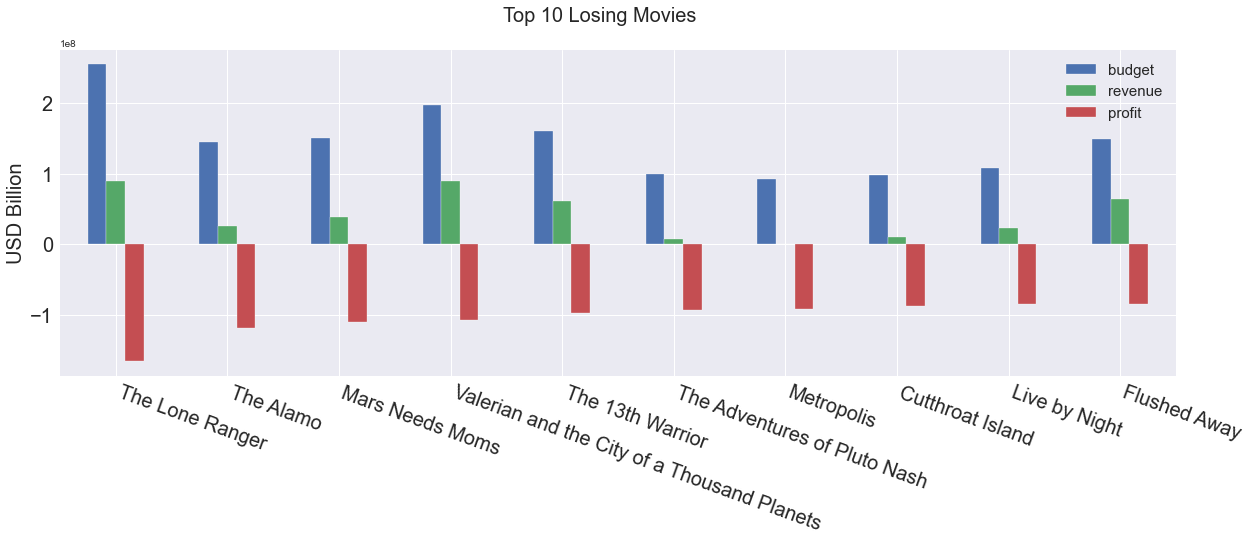

In [28]:
top_10_loss = profits_df[profits_df['revenue'] > 0].tail(10).sort_values(['profit', 'revenue']).set_index('title')

plt.style.use('seaborn')
top_10_loss.plot(kind='bar', figsize=(20,6), fontsize=20)
plt.ylabel('USD Billion', fontsize=20); plt.xlabel('')
plt.xticks(rotation=-20, ha='left')
plt.suptitle('Top 10 Losing Movies', fontsize=20)
plt.axes().legend(fontsize=15);

I am a little surprised to see The Lone Ranger on top of this list. Although I haven't watched this movie I knew Johnny Depp was in it and thought that it was a success. The 13th Warrior is another surprise. In my exprience movies with good plots always have a imdb rating greater than 6. Both these movies have imdb rating greater than 6 but have been unsuccessfull in the box office. I really have no idea about other movies on this list.

<hr style="height:2px; border-radius:10px; background: linear-gradient(to right, #0F2027, #203A43, #2C5364);"> </hr>

#### Ratings <a id='C77'></a>

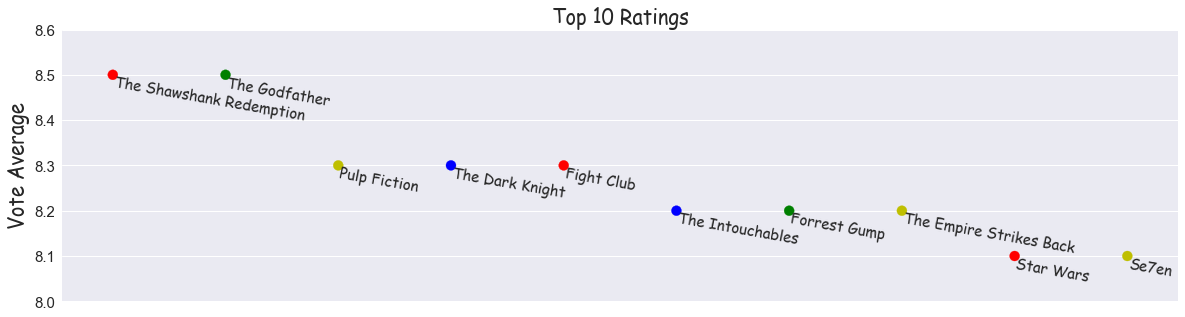

In [29]:
cond = (movies.vote_count)>5000
ratings = movies.loc[cond, ['title', 'vote_average']].sort_values('vote_average', ascending=False)
top_10_ratings = ratings.head(10)

plt.style.use('seaborn')
_ = top_10_ratings.plot(kind='scatter', x='title', y='vote_average', grid=True,
                        figsize=(20,5), fontsize=15, xticks='', ylim=(8,8.6), s=100, 
                        c=['r', 'g', 'y', 'b', 'r', 'b', 'g', 'y', 'r', 'y',]);
for i, (title, vote) in enumerate(zip(top_10_ratings.title, top_10_ratings.vote_average)):
    _ = plt.text(i, vote, title, rotation=-10, va='top', ha='left', 
                 fontsize=15, fontfamily='fantasy');
plt.ylabel('Vote Average', fontsize=20, fontfamily='fantasy');
plt.title('Top 10 Ratings', fontsize=20, fontfamily='fantasy')
plt.xlabel('');

<hr style="height:5px; border-radius:10px; background: linear-gradient(to right, #0F2027, #203A43, #2C5364);"> </hr>

### Asking and Answering Questions <a id='C80'></a>

####  What are the movie genres that famous directors (Hollywood and Bollywood) have mostly worked in? <a id='C81'></a>
We will be merging the credits csv file with movies DataFrame to answer this question. The credits csv comes separately with this dataset. The following code cells prepares the data for visualization. You can jump to [Answer: Famous Directors - Genre Visualization](#C93) section to see the heatmap that answers this question.

##### Credits Head
A quick look at the DataFrame

In [30]:
credits = pd.read_csv('credits.csv')
credits.head()

cast  \
0  [{'cast_id': 14, 'character': 'Woody (voice)',...   
1  [{'cast_id': 1, 'character': 'Alan Parrish', '...   
2  [{'cast_id': 2, 'character': 'Max Goldman', 'c...   
3  [{'cast_id': 1, 'character': "Savannah 'Vannah...   
4  [{'cast_id': 1, 'character': 'George Banks', '...   

                                                crew     id  
0  [{'credit_id': '52fe4284c3a36847f8024f49', 'de...    862  
1  [{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...   8844  
2  [{'credit_id': '52fe466a9251416c75077a89', 'de...  15602  
3  [{'credit_id': '52fe44779251416c91011acb', 'de...  31357  
4  [{'credit_id': '52fe44959251416c75039ed7', 'de...  11862

##### Cleaning Credits Dataframe

Let's extract only the cast and the director from the credits DataFrame for now.

In [31]:
import re

cast_regex = re.compile(r"'name': '(.*?)'")
director_regex = re.compile(r"'Director', 'name': '(.*?)'")
credits['cast'] = credits['cast'].apply(lambda x: ', '.join(cast_regex.findall(x)))
credits['director'] = credits['crew'].apply(lambda x: ', '.join(director_regex.findall(x)))

In [32]:
credits.head()

cast  \
0  Tom Hanks, Tim Allen, Don Rickles, Jim Varney,...   
1  Robin Williams, Jonathan Hyde, Kirsten Dunst, ...   
2  Walter Matthau, Jack Lemmon, Ann-Margret, Soph...   
3  Whitney Houston, Angela Bassett, Loretta Devin...   
4  Steve Martin, Diane Keaton, Martin Short, Kimb...   

                                                crew     id         director  
0  [{'credit_id': '52fe4284c3a36847f8024f49', 'de...    862    John Lasseter  
1  [{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...   8844     Joe Johnston  
2  [{'credit_id': '52fe466a9251416c75077a89', 'de...  15602    Howard Deutch  
3  [{'credit_id': '52fe44779251416c91011acb', 'de...  31357  Forest Whitaker  
4  [{'credit_id': '52fe44959251416c75039ed7', 'de...  11862    Charles Shyer

##### Merging Directors and Movie Genres
Listed below are directors and the movies genres for each movie id.

In [33]:
cond = credits.director == ''
directors = credits.loc[~cond, ['id', 'director']] #List of directors without ''

cond2 = movies.genres == ''
genres = movies.loc[~cond2, 'genres'].reset_index() #Movie genres without ''
genres['id'] = genres['id'].astype(int) #Changing id to from obj to int for merging

director_genre = pd.merge(genres, directors, on='id') #Merging
director_genre.head(5)

id                      genres         director
0    862   Animation, Comedy, Family    John Lasseter
1   8844  Adventure, Fantasy, Family     Joe Johnston
2  15602             Romance, Comedy    Howard Deutch
3  31357      Comedy, Drama, Romance  Forest Whitaker
4  11862                      Comedy    Charles Shyer

##### Creating Dummy Varaibles for Genres
This process will help with retrieving the totals of each genre that a director has worked in.

In [34]:
genre_dummies = director_genre.genres.str.get_dummies(sep=', ') #Creating dummy variables for genres from director_genre
director_genre_dummies = director_genre.join(genre_dummies) #Joining director_genre with genre_dummies
director_genre_dummies.head(3)

id                      genres       director  Action  Adventure  \
0    862   Animation, Comedy, Family  John Lasseter       0          0   
1   8844  Adventure, Fantasy, Family   Joe Johnston       0          1   
2  15602             Romance, Comedy  Howard Deutch       0          0   

   Animation  Comedy  Crime  Documentary  Drama  Family  Fantasy  Foreign  \
0          1       1      0            0      0       1        0        0   
1          0       0      0            0      0       1        1        0   
2          0       1      0            0      0       0        0        0   

   History  Horror  Music  Mystery  Romance  Science Fiction  TV Movie  \
0        0       0      0        0        0                0         0   
1        0       0      0        0        0                0         0   
2        0       0      0        0        1                0         0   

   Thriller  War  Western  
0         0    0        0  
1         0    0        0  
2         0    0        0

##### Famous Directors Genre Totals
Let us now create genre totals for all directors from the above DataFrame and filter only famous directors.

In [35]:
famous_directors = ['Martin Scorsese', 'Quentin Tarantino', 'Steven Spielberg', 'Alfred Hitchcock', 'Christopher Nolan',
                   'Tim Burton', 'James Cameron', 'Ridley Scott', 'George Lucas', 'Woody Allen', 'Clint Eastwood',
                   'Michael Bay', 'Guillermo del Toro', 'John Carpenter', 'Oliver Stone', 'Anurag Kashyap',
                   'Satyajit Ray', 'Mani Ratnam', 'Yash Chopra', 'Rajkumar Hirani', 'Prakash Jha', 'Karan Johar',
                   'S. Shankar', 'Mahesh Bhatt', 'Imtiaz Ali', 'A.R. Murugadoss'] # a small list of famous directors(google)

director_genre_totals = director_genre_dummies.groupby('director').sum() #summing the genres for each director with groupby
cond = director_genre_totals.index.isin(famous_directors) #checking if famous director are in director_genre_totals
famous_director_genres = director_genre_totals[cond] #filter for famous directors
famous_director_genres.drop('id', axis='columns', inplace=True) #dropping id as it is not required
famous_director_genres.head(3)

Action  Adventure  Animation  Comedy  Crime  Documentary  \
director                                                                     
A.R. Murugadoss        5          0          0       0      0            0   
Alfred Hitchcock       2          2          0       5     17            0   
Anurag Kashyap         1          0          0       1      7            0   

                  Drama  Family  Fantasy  Foreign  History  Horror  Music  \
director                                                                    
A.R. Murugadoss       3       0        0        0        0       0      0   
Alfred Hitchcock     30       0        0        0        0       2      0   
Anurag Kashyap        6       0        0        3        0       0      0   

                  Mystery  Romance  Science Fiction  TV Movie  Thriller  War  \
director                                                                       
A.R. Murugadoss         2        2                1         0         4    0   
Alfred Hitchcock       22        4                0         0        34    4   
Anurag Kashyap          2        1                0         0         6    0   

                  Western  
director                   
A.R. Murugadoss         0  
Alfred Hitchcock        0  
Anurag Kashyap          0

##### Answer: Famous Directors - Genre Visualization <a id='C93'></a>

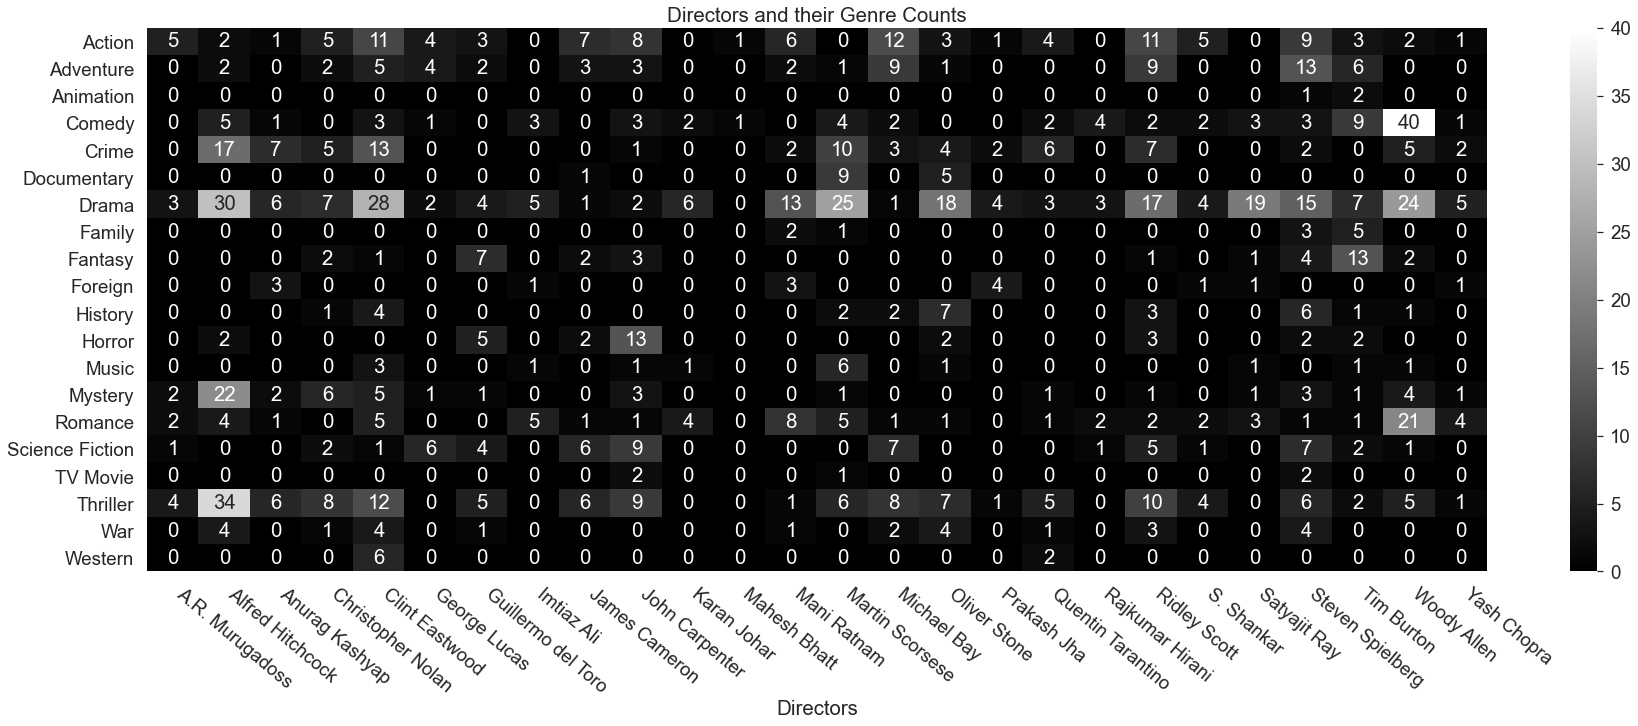

In [36]:
plt.figure(figsize=(30,10))
sns.set(font_scale=1.7)
sns.heatmap(famous_director_genres.T, cmap='gist_gray', annot=True)

plt.title('Directors and their Genre Counts')
plt.xlabel('Directors')
plt.xticks(rotation=-40, ha='left');

Some of the directors and the genres that they have worked in is quite evident from the plot.

- Alfred Hitchcock: Thriller, Drama, Mystery and Crime
- Clint Eastwood: Drama and Thriller
- John Carpenter: Horror
- Martin Scorsese, Mani Ratnam and Olive Stone: Drama
- Ridley Scott: Drama, Action, Thriller and Adventure
- Satyajit Ray: Drama
- Steven Spielberg: Drama, Adventure and Action
- Tim Burton: Fantasy and Comedy
- Woody Allen: Comedy, Drama and Romance

<hr style="height:2px; border-radius:10px; background: linear-gradient(to right, #0F2027, #203A43, #2C5364);"> </hr>

#### Who are the most number of actors that famous directors have worked with? <a id='C97'></a>

To answer this question we will use the Counter submodule from collections and the operator module both of which are python's inbuilt modules. The dummy variables approach from earlier cannot be used as the cast list too large to create a dataframe resulting in a memory allocation error. The following code cells performs data wrangling on the credits dataframe to [answer](#C102) the question. 

##### Create a DataFrame of Casts from All Movies Under Each Director

In [37]:
df = credits[['director', 'cast']] #create a dataframe of directors and actors from credits dataframe
df['cast'] = df.groupby('director')['cast'].transform(lambda cast: ' '.join(cast)) #groubpy director and transform cast into one giant string of all cast
df = df.drop_duplicates() #to drop duplicates created by the previous line
df.head()

director                                               cast
0    John Lasseter  Tom Hanks, Tim Allen, Don Rickles, Jim Varney,...
1     Joe Johnston  Robin Williams, Jonathan Hyde, Kirsten Dunst, ...
2    Howard Deutch  Walter Matthau, Jack Lemmon, Ann-Margret, Soph...
3  Forest Whitaker  Whitney Houston, Angela Bassett, Loretta Devin...
4    Charles Shyer  Steve Martin, Diane Keaton, Martin Short, Kimb...

##### Get Counts of Each Cast and Sort From Highest to Lowest

In [38]:
def cast_count_sort(cast_names):
    d = dict(Counter(cast_names)) #creates a dict with counts of cast names as key, value pairs
    sorted_d = dict(sorted(d.items(), key=operator.itemgetter(1),reverse=True)) #sort the dict in descending
    top_2 = list(sorted_d.items())[:5] #create a list of the sorted dict and slice the first 5
    return top_2

df['cast'] = df['cast'].str.split(', ').apply(cast_count_sort) #aplly cast_count_sort function to cast
df.head()

director                                               cast
0    John Lasseter  [(John Ratzenberger, 3), (Tim Allen, 2), (Don ...
1     Joe Johnston  [(James Handy, 2), (Darryl Henriques, 2), (Lau...
2    Howard Deutch  [(Walter Matthau, 2), (Saul Rubinek, 2), (Lea ...
3  Forest Whitaker  [(Lela Rochon, 2), (Whitney Houston, 1), (Ange...
4    Charles Shyer  [(Eugene Levy, 3), (Diane Keaton, 2), (Martin ...

##### Answer: Famous Directors - Most Number of Actors Worked With. <a id='C102'></a>

In [39]:
cond = df.director.isin(famous_directors)
director_actor = df[cond] #filter for famous directors
director_actor = director_actor.set_index(np.arange(len(director_actor))) #set index to len of dataframe, used for merge
actor = pd.DataFrame(director_actor.cast.tolist(), 
                     columns=['actor_1', 'actor_2', 'actor_3', 
                              'actor_4', 'actor_5']) #create a dataframe of actors with individual columns
pd.merge(director_actor, actor, left_index=True, right_index=True).set_index('director').drop('cast', axis='columns')

actor_1                       actor_2  \
director                                                                      
Oliver Stone            (John C. McGinley, 6)             (Oliver Stone, 6)   
Martin Scorsese          (Martin Scorsese, 8)         (Charles Scorsese, 6)   
Woody Allen                   (Mia Farrow, 8)              (Woody Allen, 6)   
Ridley Scott              (Giannina Facio, 8)            (Zeljko Ivanek, 3)   
Clint Eastwood              (Doug McGrath, 4)             (Sondra Locke, 4)   
Michael Bay              (Glenn Morshower, 6)             (Peter Cullen, 5)   
Tim Burton          (Helena Bonham Carter, 6)               (Lisa Marie, 4)   
George Lucas             (Anthony Daniels, 4)              (Kenny Baker, 4)   
Quentin Tarantino      (Samuel L. Jackson, 5)        (Quentin Tarantino, 5)   
John Carpenter           (Charles Cyphers, 6)              (Peter Jason, 5)   
James Cameron                (Bill Paxton, 4)           (Linda Hamilton, 3)   
Steven Spielberg               (Pat Roach, 3)             (Ted Grossman, 3)   
Guillermo del Toro            (Doug Jones, 4)           (Federico Luppi, 3)   
Satyajit Ray            (Karuna Bannerjee, 4)          (Sharmila Tagore, 4)   
Alfred Hitchcock       (Alfred Hitchcock, 16)           (Leo G. Carroll, 6)   
Christopher Nolan          (Michael Caine, 7)                (Russ Fega, 5)   
Yash Chopra             (Amitabh Bachchan, 2)              (Anupam Kher, 2)   
Mani Ratnam                (Sanjay Mishra, 2)                (Esha Deol, 2)   
Karan Johar                        (Kajol, 4)             (Rani Mukerji, 3)   
Imtiaz Ali                 (Shahid Kapoor, 1)           (Kareena Kapoor, 1)   
Rajkumar Hirani              (Boman Irani, 3)          (Parikshat Sahni, 3)   
Prakash Jha               (Manoj Bajpayee, 3)             (Nana Patekar, 2)   
A.R. Murugadoss          (Asin Thottumkal, 2)  (Pradeep Ram Singh Rawat, 2)   
S. Shankar                (Cochin Haneefa, 4)                (Santhanam, 2)   
Anurag Kashyap         (Aditya Srivastava, 4)      (Nawazuddin Siddiqui, 2)   
Mahesh Bhatt                 (Juhi Chawla, 2)            (Sonali Bendre, 2)   

                                      actor_3                      actor_4  \
director                                                                     
Oliver Stone                  (Sean Stone, 5)                (Dale Dye, 4)   
Martin Scorsese       (Catherine Scorsese, 5)           (Harvey Keitel, 5)   
Woody Allen           (David Ogden Stiers, 5)            (Dianne Wiest, 5)   
Ridley Scott            (Sigourney Weaver, 3)           (Velibor Topic, 3)   
Clint Eastwood            (George Orrison, 3)            (Laura Linney, 3)   
Michael Bay                    (Mark Ryan, 5)             (Reno Wilson, 5)   
Tim Burton                 (Michael Gough, 4)         (Christopher Lee, 4)   
George Lucas             (Natalie Portman, 3)           (Ian McDiarmid, 3)   
Quentin Tarantino         (Michael Madsen, 4)           (Michael Parks, 4)   
John Carpenter                (Jeff Imada, 3)                (Al Leong, 3)   
James Cameron          (Jenette Goldstein, 3)           (Michael Biehn, 3)   
Steven Spielberg    (Richard Attenborough, 2)         (Joseph Mazzello, 2)   
Guillermo del Toro           (Ron Perlman, 3)           (Norman Reedus, 2)   
Satyajit Ray               (Santosh Dutta, 4)         (Anil Chatterjee, 3)   
Alfred Hitchcock            (Bess Flowers, 5)            (John Longden, 5)   
Christopher Nolan         (Cillian Murphy, 5)              (John Nolan, 3)   
Yash Chopra               (Shah Rukh Khan, 1)            (Preity Zinta, 1)   
Mani Ratnam                (Karthik Kumar, 2)  (Aishwarya Rai Bachchan, 2)   
Karan Johar               (Shah Rukh Khan, 2)            (Farida Jalal, 2)   
Imtiaz Ali                 (Saumya Tandon, 1)             (Tarun Arora, 1)   
Rajkumar Hirani           (Saurabh Shukla, 2)            (Arshad Warsi, 2)   
Prakash Jha                    

The dataframe answers our question but we can see that it is not accurate. For e.g. [Shahrukh Khan](https://www.google.com/search?rlz=1C1CHBF_enIN815IN815&sxsrf=ALeKk00U4MmUOGJuvzooJNuXoWOThEIYYQ%3A1601024282712&ei=GrFtX7eJK5nl9QO4pLf4Dw&q=Yash+Chopra+Shahrukh+Khan+movies&oq=Yash+Chopra+Sharukh+Khan+movies&gs_lcp=CgZwc3ktYWIQAzIECCMQJzIGCAAQFhAeMgYIABAWEB5QAFgAYO0saABwAHgAgAFYiAFYkgEBMZgBAKoBB2d3cy13aXrAAQE&sclient=psy-ab&ved=0ahUKEwi3_pad-IPsAhWZcn0KHTjSDf8Q4dUDCA0&uact=5) appearing in only 1 movies that Yash Chopra has directed in is not correct. You may also notice that some of the director names appear in the cast list as well. Google search shows that these directors have infact acted in many of their own movies. [Quentin Tarantino](https://www.quora.com/Does-Quentin-Tarantino-appear-in-all-of-his-movies) for example has made a cameo appearances in five of his movies - *Reservoir Dogs, Pulp Fiction, Death Proof, Django Unchained, and Inglourious Basterds.* A google search on [Woody Allen](https://www.quora.com/Why-does-Woody-Allen-star-in-so-many-of-his-own-films) as well confirms the same.

<hr style="height:2px; border-radius:10px; background: linear-gradient(to right, #0F2027, #203A43, #2C5364);"> </hr>

#### What are the top 10 languages in terms of revenue ? <a id='C106'></a>
We can answer this question by grouping the movies dataframe by *original_language*, aggregating and sorting the *revenue* column in descending order. The get_language function uses the external pycountry module and returns the full name of the language from the language shortcode. This step is not necessary and I have used it only for data representation below. The cn language shortcode returns np.nan so we can manually fill this with the correct language name - 'Chinese'.

##### Answer: Top 10 Languages in Terms of Revenue

In [40]:
def get_language(short_code):                                   #a function to extract language from language short-code.
    language = pycountry.languages.get(alpha_2=str(short_code))
    if language:
        return language.name
    else:
        return np.nan
top10_lang_rev = movies.groupby('original_language').sum()['revenue'].sort_values(ascending=False)[:10].to_frame()
top10_lang_rev['language'] = top10_lang_rev.index.map(get_language).fillna('Chinese') 
top10_lang_rev

revenue  language
original_language                            
en                489,474,683,981.0   English
ja                  3,593,021,014.0  Japanese
zh                  3,344,862,587.0   Chinese
fr                  2,687,874,361.0    French
hi                  2,671,224,642.0     Hindi
es                  1,079,643,285.0   Spanish
ko                    968,643,475.0    Korean
cn                    962,525,769.0   Chinese
ru                    813,809,870.0   Russian
de                    762,197,134.0    German

<hr style="height:2px; border-radius:10px; background: linear-gradient(to right, #0F2027, #203A43, #2C5364);"> </hr>

#### What are the top 10 rated movies in the top 10 languages with the highest revenue? <a id='C110'></a>

We can answer this question by first filtering for languages we got from answering the previous question and also for movies with vote count greater than 100 and saving it to a dataframe. The last filter solves the problem of retrieving movies with a unreleastic rating of 10 and also account for foreign languages with considerably less number of vote count.

We can then groupby original language and rank the vote averages with *method='first'* to break ties. Finally create a column. Finally create column with language names as we did before and pivot the dataframe to retrieve the titles.

##### Answer: Top 10 Rated Movies in Top 10 Languages with the Highest Revenue

In [41]:
cond = (movies.original_language.isin(top10_lang_rev.index)) & (movies.vote_count>100)
title_vote_avg = movies.loc[cond,['title', 'vote_average', 'original_language']]

grouped = title_vote_avg.groupby('original_language')
title_vote_avg['vote_rank'] = grouped['vote_average'].rank(method='first').astype(int)
title_vote_avg['language'] = title_vote_avg['original_language'].apply(get_language).fillna('Chinese')

lang_top10 = title_vote_avg[title_vote_avg['vote_rank']<11]
lang_top10.pivot(['language', 'original_language'], 'vote_rank', 'title')

vote_rank                                                  1   \
language original_language                                      
Chinese  cn                                The Accidental Spy   
         zh                                      Dragon Blade   
English  en                                 House of the Dead   
French   fr                        The Visitors: Bastille Day   
German   de                                          Wetlands   
Hindi    hi                 Lagaan: Once Upon a Time in India   
Japanese ja                         Battle Royale II: Requiem   
Korean   ko                                Dragon Wars: D-War   
Russian  ru                                         Guardians   
Spanish  es                                    [REC]³ Genesis   

vote_rank                                                 2   \
language original_language                                     
Chinese  cn                                   Chinese Zodiac   
         zh                                  The Grandmaster   
English  en                             Dragonball Evolution   
French   fr                                           Desire   
German   de                                            Cargo   
Hindi    hi                                    Kal Ho Naa Ho   
Japanese ja                 Saint Seiya: Legend of Sanctuary   
Korean   ko                                         The Host   
Russian  ru                                        Day Watch   
Spanish  es                                [REC]⁴ Apocalypse   

vote_rank                                        3   \
language original_language                            
Chinese  cn                                     CJ7   
         zh                              Wolf Totem   
English  en                       Battlefield Earth   
French   fr                 French Fried Vacation 3   
German   de                     Rabbit Without Ears   
Hindi    hi                            The Lunchbox   
Japanese ja                         Attack on Titan   
Korean   ko                             Snowpiercer   
Russian  ru                             Night Watch   
Spanish  es                              Aftershock   

vote_rank                                                                  4   \
language original_language                                                      
Chinese  cn                                                      Mr. Nice Guy   
         zh                 Detective Dee and the Mystery of the Phantom F...   
English  en                                                 Alone in the Dark   
French   fr                                                           Brice 3   
German   de                                                          Kokowaah   
Hindi    hi                                          Kabhi Khushi Kabhie Gham   
Japanese ja                                     Pokémon: Spell of the Unknown   
Korean   ko                                             A Tale of Two Sisters   
Russian  ru                                  Mongol: The Rise of Genghis Khan   
Spanish  es                                                  Spanish Affair 2   

vote_rank                                            5   \
language original_language                                
Chinese  cn                               Game of Death   
         zh                  Curse of the Golden Flower   
English  en                              Disaster Movie   
French   fr                                  Lucky Luke   
German   de                                     Phoenix   
Hindi    hi                            Taare Zameen Par   
Japanese ja                 Resident Evil: Degeneration   
Korean   ko                                      Thirst   
Russian  ru                                 Russian Ark   
Spanish  es                                Room in Rome   

vote_rank                                                       6   \
language original_language           

<hr style="height:2px; border-radius:10px; background: linear-gradient(to right, #0F2027, #203A43, #2C5364);"> </hr>

#### What are the top 5 Genres each year ? <a id='C114'></a>

To answer this question we will create dummy variables for genres as we did earlier, resample the data on a yearly frequency and create a DataFrame of totals to visualize the data with a [bar chart race](https://www.dexplo.org/bar_chart_race/).

In [42]:
cond = (movies.status == 'Released') & (movies.genres != '') & (movies.release_date.notna()) #filter for releaesed, non-empty genres missing release dates
released_movies = movies[cond] 
release_year = pd.to_datetime(released_movies.release_date) #retrieving year from released_movies

In [43]:
genre_dummies = released_movies.genres.str.get_dummies(sep=', ').set_index(release_year).sort_index() #creating genre dummy variables
genre_yearly = genre_dummies.resample('Y').sum() #create yearly totals
genre_yearly = genre_yearly.loc[(genre_yearly != 0).any(axis=1)] #remove rows which are all zeros, cause by yearly resampling.

*The code below will take some time to run.*

In [44]:
html = bcr.bar_chart_race(genre_yearly, period_fmt='%Y', fixed_order=False, n_bars=5,
                   interpolate_period=False, period_length=2000,
                  steps_per_period=20) #create bar char race and save to html variable

##### Answer: Top 5 Genres by year

In [45]:
HTML(html.data) #display html data using the IPython's diplay submodule passed to the HTML function. 

Below is the summary of the trend in genres over the years:
- 1874-1900: Not many movies in our data. Documentary taking the first place for sometime followed by Fantasy, Comedy and Horror.
- 1900-1920: We can mostly observe Drama, Comedy and Romance but Fantasy and Animation appear as well.
- 1920-1930: We see Music making a brief apperance along with Drama, Comedy, Romance and Crime.
- 1930-1970: Many Genres swap places during this period, however Drama remains on top.
- 1970-2000: Horror finally shows itself during the 70's and late 80's. Action briefly takes 3rd place during late 90's.
- 2000-2017: We again see Documentary coming in to the top 5 here. 

<hr style="height:10px; border-radius:10px; background: linear-gradient(to right, #0F2027, #203A43, #2C5364);"> </hr>

## Summary and Conclusion <a id='C123'></a>

We just scratched the surface with our analysis in this notebook. More insights can be gained by exploring the remaing columns and other files from the dataset. 

Shortcomings: The dataset was highly skewed towards large values due to large number of small or zero values. The lack of information for other language movies was evident when we we tried to answer the second question. There were many missing values in the object data type columns - genre, title, etc. These were filtered on the go during the analysis. Assuming these shortcomings were not present we can be confident with our results above and gain more insights by comparing other categorical features that were not explored.

The sections covered in the notebook should serve as a rough guide on the steps for performing data analysis and visualization. I hope the reader discovers something new as i did. Some of the useful links and references are listed below.

- [Bar Chart Race Tutorial](https://www.dexplo.org/bar_chart_race/tutorial/)
- [Bar Chart Race - Medium Post](https://medium.com/dunder-data/create-a-bar-chart-race-animation-in-python-with-matplotlib-477ed1590096)
- [Jupyter Notebook - Tips, Tricks and Shortcuts](https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/)
- [Python - Collections](https://www.youtube.com/watch?v=cgDRugJzBfM)
- [Creating a table of contents in a IPython Notebook](https://sebastianraschka.com/Articles/2014_ipython_internal_links.html#bottom)

In [46]:
    # jovian.commit(project=project_name, environment=None, files=["movies_metadata.csv"])